# Purpose

<H3>To build a classifier that identifies a successful or unsuccessful Kickstarter project.</H3>

## Dataset 

- kickstarter-dataset-1.csv
- kickstarter-dataset-2.csv

## Process Flow


![process_flow](images/process.JPG)

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

## DATA Loading 

Load both datasets using pandas library. 

In [3]:
dataset_1 = pd.read_csv('kickstarter-dataset-1.zip',encoding='ISO-8859-9')
dataset_2 = pd.read_csv('kickstarter-dataset-2.zip',encoding='ISO-8859-9' )

dataset_1 = dataset_1.drop(['Unnamed: 15','Unnamed: 16'], axis =1)

In [4]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323750 entries, 0 to 323749
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID              323750 non-null  int64 
 1   name            323746 non-null  object
 2   category        323745 non-null  object
 3   main_category   323750 non-null  object
 4   currency        323750 non-null  object
 5   deadline        323750 non-null  object
 6   goal            323750 non-null  object
 7   launched        323750 non-null  object
 8   pledged         323750 non-null  object
 9   state           323750 non-null  object
 10  backers         323750 non-null  object
 11  country         323750 non-null  object
 12  usd pledged     319960 non-null  object
 13  Unnamed: 13     625 non-null     object
 14  Unnamed: 14     12 non-null      object
dtypes: int64(1), object(14)
memory usage: 37.1+ MB


In [5]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [6]:
dataset_1.head(4)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN


In [7]:
dataset_2.head(4)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00


# DATA Cleaning  


### 1 Fix Column Titles

#### Dataset-1: 
It has been observed that the **dataset-1** quality is not good.

    - Column names are with additional space.  

In [8]:
#1 Column Name
# Dataset-2 column titles are correct. I will replace dataset-1 column titles with dataset-2 titles. 

correct_columns = (dataset_2.columns)
dataset_1=dataset_1.set_axis(correct_columns,axis=1)

 - The csv file is ',' delimiter but there are ',' as texts in the `name` ,`category` and `main_category`. Due to which some data is corrupted (shifted to the next columns) and has to be removed. 
    
![corrupt_data](images/corrupt_data_sample.JPG)    


In [9]:
#2 Remove corrupt data 

def remove_corrupt_data(dataset):
    '''
    Parameters
    ----------
    dataset : TYPE: dataframe (pandas)
    
    DESCRIPTION.
    Removes all datasets which do not fullfil data format of three columns. [currency, goals, deadline].
    These columns are selected after reviewing the datasets. 
    It is observed that csv files have ',' as a delimiter as well as a text.

    Returns
    -------
    cleaned_dataset : TYPE: dataframe (pandas).

    '''
    # To identify clean data, I defined `currency` format (length 3 and all CAPITAL letters). REGEX '^[^a-z]*$'
    # All datasets which doesnot have correct format of `currency` should be removed. 
    cur_check1 = (dataset.index[dataset['currency'].str.match('^[^a-z]*$') == True])
    print(f'length of corrupted data based on currency format {len(dataset) - len(cur_check1)}')
    dataset_clean = dataset.iloc[cur_check1]

    # For reassurance, check the next columns as well. deadline column has all numbers. REGEX ^[^0-9]*$

    # All datasets which doesnot have correct format of `deadline` should be removed. 
    cur_check2 = (dataset.index[dataset['deadline'].str.match('^[^0-9]*$') != True])
    print(f'length of corrupted data based on deadline format {len(dataset) - len(cur_check2)}')
    dataset1_clean = dataset.iloc[cur_check2]

    # `goal` data is REGEX ^[0-9]*$
    cur_check3 = (dataset.index[dataset['goal'].str.match('^[0-9]*$') == True])
    print(f'length of corrupted data based on deadline format {len(dataset) - len(cur_check3)}')
    dataset_clean = dataset_1.iloc[cur_check3]
    
    return dataset_clean

In [11]:
dataset_1 = remove_corrupt_data(dataset_1)

length of corrupted data based on currency format 632
length of corrupted data based on deadline format 632
length of corrupted data based on deadline format 905


### 2 Concatenate both Tables

Merge both tables.

In [12]:
# MERGE BOTH TABLES
dataset = pd.concat([dataset_2,dataset_1],axis=0)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701506 entries, 0 to 323749
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ID                701506 non-null  int64 
 1   name              701498 non-null  object
 2   category          701506 non-null  object
 3   main_category     701506 non-null  object
 4   currency          701506 non-null  object
 5   deadline          701506 non-null  object
 6   goal              701506 non-null  object
 7   launched          701506 non-null  object
 8   pledged           701506 non-null  object
 9   state             701506 non-null  object
 10  backers           701506 non-null  object
 11  country           701506 non-null  object
 12  usd pledged       693919 non-null  object
 13  usd_pledged_real  378661 non-null  object
 14  usd_goal_real     378661 non-null  object
dtypes: int64(1), object(14)
memory usage: 85.6+ MB


### 3 Data Type 

Fix data types of both tables. It is evident that the datatype of table one needs adjustment as numerical fields are 'object' data type. 

- `goal`,`pledged`, `backers`, `usd pledged` should be int.

- extract year from `launched` and `deadline` to calculate the `project duration`. `project duration` should be int.

- `category`, `main_category`,`currency`,`country` should be categorical data. 

In [40]:
categorical_data = ['category', 'main_category','currency','country']

for categories in categorical_data:
    dataset[categories] = dataset[categories].astype('category')      
    
dataset['launched'] = pd.to_datetime(dataset.launched)
dataset['deadline'] = pd.to_datetime(dataset.deadline)

In [15]:
# Convert required columns datatype into int64. 
number_data = ['goal','pledged','backers','usd pledged','launched_year','deadline_year']
for numbers in number_data:
    dataset[numbers] = dataset[numbers].astype(float).astype('float64') 

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701506 entries, 0 to 323749
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   ID                701506 non-null  int64   
 1   name              701498 non-null  object  
 2   category          701506 non-null  category
 3   main_category     701506 non-null  category
 4   currency          701506 non-null  category
 5   deadline          701506 non-null  object  
 6   goal              701506 non-null  float64 
 7   launched          701506 non-null  object  
 8   pledged           701506 non-null  float64 
 9   state             701506 non-null  object  
 10  backers           701506 non-null  float64 
 11  country           701506 non-null  category
 12  usd pledged       693919 non-null  float64 
 13  usd_pledged_real  378661 non-null  object  
 14  usd_goal_real     378661 non-null  object  
 15  launched_year     701506 non-null  float64 
 16  de

### 4 Nan/ Null  Values

- `Nan` Handling specific to the columns 
    - Replace `Nan` with Zero
       - In the numerial features column, replace Nan with a zero as each project is different from the other. Therefore median value might not be the right option.  
       
    - Replace `Nan` with NA
  


In [18]:
dataset['name']=dataset['name'].fillna('not_given')
dataset['usd pledged']=dataset['usd pledged'].fillna(0.00)
dataset['usd_pledged_real']=dataset['usd_pledged_real'].fillna('0.00')
dataset['usd_goal_real']=dataset['usd_goal_real'].fillna('0.00')

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701506 entries, 0 to 323749
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   ID                701506 non-null  int64   
 1   name              701506 non-null  object  
 2   category          701506 non-null  category
 3   main_category     701506 non-null  category
 4   currency          701506 non-null  category
 5   deadline          701506 non-null  object  
 6   goal              701506 non-null  float64 
 7   launched          701506 non-null  object  
 8   pledged           701506 non-null  float64 
 9   state             701506 non-null  object  
 10  backers           701506 non-null  float64 
 11  country           701506 non-null  category
 12  usd pledged       701506 non-null  float64 
 13  usd_pledged_real  701506 non-null  object  
 14  usd_goal_real     701506 non-null  object  
 15  launched_year     701506 non-null  float64 
 16  de

In [119]:
dataset['duration'] = dataset['deadline'] - dataset['launched']
# Extract number of days from the duration
dataset['days'] = dataset['duration'].values.astype('timedelta64[D]')/np.timedelta64(1, 'D')

In [120]:
dataset.head(4)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_year,deadline_year,duration,days_ns,days
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0.0,GB,0.0,0,1533.95,2015.0,2015.0,58 days 11:47:32,58 days 11:47:32,58.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15.0,US,100.0,2421,30000,2017.0,2017.0,59 days 19:16:03,59 days 19:16:03,59.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3.0,US,220.0,220,45000,2013.0,2013.0,44 days 23:39:10,44 days 23:39:10,44.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1.0,US,1.0,1,5000,2012.0,2012.0,29 days 20:35:49,29 days 20:35:49,29.0


## EXPLORATORY DATA ANALYSIS

The purpose of this section is to understand our dataset better. 

In [146]:
dataset.corr()

,ID,goal,pledged,backers,usd pledged,launched_year,deadline_year,days
ID,1.000000,0.001654,0.000269,0.000594,-0.000573,-0.000394,-0.000559,-0.001222
goal,0.001654,1.000000,0.007137,0.004465,0.005922,0.017135,0.017763,0.004067
pledged,0.000269,0.007137,1.000000,0.728756,0.895833,0.026642,0.026373,0.000667
backers,0.000594,0.004465,0.728756,1.000000,0.705791,0.015029,0.014123,-0.000893
usd pledged,-0.000573,0.005922,0.895833,0.705791,1.000000,-0.000995,-0.001484,0.000669
launched_year,-0.000394,0.017135,0.026642,0.015029,-0.000995,1.000000,0.985543,-0.136553
deadline_year,-0.000559,0.017763,0.026373,0.014123,-0.001484,0.985543,1.000000,-0.035983
days,-0.001222,0.004067,0.000667,-0.000893,0.000669,-0.136553,-0.035983,1.000000


### The bar graph below shows number of projects with respect to the category of the project.

graph for total = 15


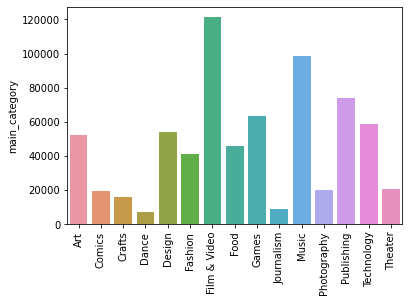

In [83]:
cat_num = dataset['main_category'].value_counts()
print("graph for total = %d" % (len(cat_num)))
chart = sns.barplot(x= cat_num.index, y=cat_num)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show()

### The bar graph below shows the project status `state` with respect to the category of the project.

It seems that `film and studio` related projects are the most successful ones as well as this section has the maximum failures too. 

Interestingly, `Threatre` has goodd number of successes as compared to the failures. 

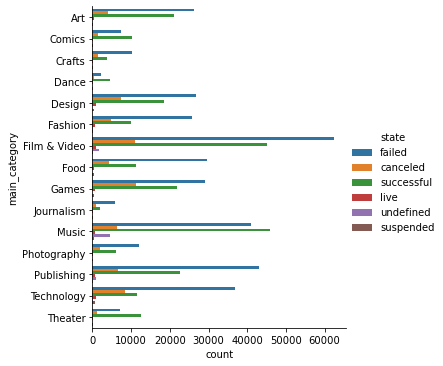

In [82]:
sns.catplot(y="main_category", hue="state" ,kind="count", data=dataset)

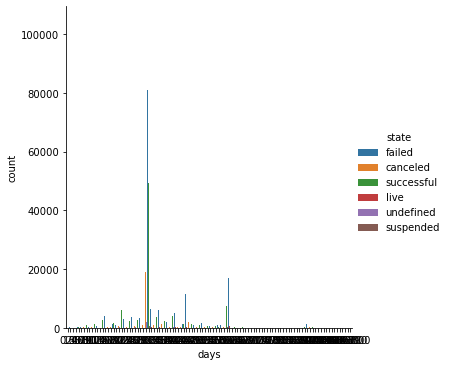

In [155]:
sns.catplot(x="days", hue="state" ,kind="count", data=dataset)

### The bar graph below shows the number of days a project took with respect to the category of the project.

In [125]:
pd.pivot_table(dataset, index =['days','main_category'], values = 'state',aggfunc = 'count').sort_values('main_category', ascending = True)

,,state
days,main_category,
0.0,Art,15.0
90.0,Art,82.0
13.0,Art,611.0
56.0,Art,121.0
55.0,Art,129.0
...,...,...
43.0,Theater,118.0
53.0,Theater,57.0
20.0,Theater,575.0


## FEATURE EXTRACTION

#### Identifying Label Class 

Purpose is to train a classification model to determine success and the failure of a project. `state` columns gives that information and is considered as a label class. 

#### Prospective Features

For classification model, it is important to identify columns that add value towards classification. Remove columns which are not valuable at this point. 

- For example: 
    - `ID` and `name` can be  removed from the feature set.
    
    - `state` is the label for the classification. Therefore, it can be saved as Y variable. 
    
**NOTE** For Exploratory Data Analysis, the above columns will be kept to get better insight of the data.  

- **Categorical Features** will be: 

    - main_category
    - country
    - currency
    
- **Numerical Features**
    
    - project_duration: can be calculated as deadline - launched
    
    - pledged
    
    - goal
    
    - backers

In [131]:
features = dataset[['main_category', 'goal','pledged','backers','country', 'days','usd pledged', 'currency']]
labels  =np.array(dataset['state'].values)
labels

array(['failed', 'failed', 'failed', ..., 'failed', 'failed', 'failed'],
      dtype=object)

## CLASSIFICATION

### Training and Testing of a Classifier 

Load both datasets using pandas library. 

In [127]:
from sklearn.model_selection import train_test_split


print(f'Final features selected before ONE-HOT Enconding using pd.Dummies \n {features.columns}')
# Get dummy data 
df_dum = pd.get_dummies(features)
#df_dum
# Train, test split 

X = df_dum
y = labels

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42 ) 

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

Final features selected before ONE-HOT Enconding using pd.Dummies 
 Index(['main_category', 'goal', 'pledged', 'backers', 'country', 'days',
       'usd pledged', 'currency'],
      dtype='object')
(491054, 58) (210452, 58)
(491054,) (210452,)


In [128]:
X_train

,goal,pledged,backers,days,usd pledged,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,...,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
350569,10000.0,2291.0,35.0,29.0,2291.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
335664,24000.0,24.0,1.0,29.0,36.920000,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
46603,8500.0,21353.0,209.0,44.0,21353.000000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
244162,350.0,350.0,1.0,30.0,573.234848,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
120256,4000.0,13259.0,413.0,34.0,19826.750000,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,15000.0,345.0,6.0,59.0,345.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
365838,16000.0,400.0,4.0,6.0,400.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
131932,5000.0,0.0,0.0,29.0,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
293309,8600.0,2883.0,25.0,25.0,2883.000000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


### Model Selection

**2 Classification Models** are selected for this project. Idea is to pick the best one for deployment purposes.

#### Model Definition and Data Selection

It is a multi-classification problem as a project outcome (`state`) can be: 

- canceled
- failed
- live 
- successful
- suspended
- undefined


#### Option -1:

- train a multi-classification model and analyse the model performance based on the 
    
    - precision
    - recall
    - f1-score
    - accuracy
    
    
#### Option -2:

- As the initial task was to predict if the model will be a success or unsuccessful. Convert this into a binary problem. 

##### Proposed Strategies

- 1) Train with the datasets of the following states:
    - Successful
    - failed (unsuccessful)
    
    
- 2) Change label of all datasets to `other states` which are **NOT** labeled as `successful`.

    **This strategy is not implemented as the problem statement exclusively asked for successful and unsuccessful projects**. 

In [174]:
#MODELS
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

def data_classification(train_x, train_y, test_x = None ,test_y = None):
    names = ["RT", "KNN"]

    classifiers = [
        RandomForestClassifier(),
        KNeighborsClassifier(n_neighbors=10)
    ]
    model_return = {}
    for name, clf in zip(names, classifiers):
        
        clf.fit(train_x, np.ravel(train_y))
        print(clf)
        
        # TRAIN
        #probs = clf.predict_proba(train_x)
        pred_ytrain = clf.predict(train_x)
        score_ytrain = clf.score(train_x,np.ravel(train_y))
        
        #TEST
        #probs_t = clf.predict_proba(test_x)
        pred_ytest = clf.predict(test_x)
        score_ytest = clf.score(test_x,np.ravel(test_y))
        
        model = {'Name' : name,
                'Classes': ['success', 'fail'],
                'Date': '2021-03-29',
                'Datasets': ['kickstarter_dataset'],
                'Training_Score' : score_ytrain,
                 'Test_Score' : score_ytest
                }
        cl_report = classification_report(np.ravel(test_y), pred_ytest, digits = 4)
        print('============================================================')
        print("classifier %s, train score %.5f \n" %(name,score_ytrain))
        print("classifier %s, test score %.5f \n" %(name,score_ytest))
        print("classifier %s " %(name), cl_report)
        print('============================================================')
        model_return[name] = clf #pred_ytrain
    return model_return

### Option -1:

- train a multi-classification model and analyse the model performance based on the 
    
    - precision
    - recall
    - f1-score
    - accuracy
    
#### OBSERVATIONS:

- RandomForest

An ensemble model performs the best (97\%  training and 89.6\% test accuracy) out of two selected model. 

Particularly, for the `successful` and the `failure` projects. 

Succesful projects precision score is **98.21 \%** with the f1-score of **98.9\%** which is quite impressive. 

In [158]:
data_classification(train_x =X_train, train_y=y_train, test_x = X_test ,test_y = y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
classifier RT, train score 0.97213 

classifier RT, test score 0.89644 

classifier RT                precision    recall  f1-score   support

    canceled     0.6291    0.3665    0.4632     21367
      failed     0.8717    0.9535    0.9108    109590
        live     0.0734    0.0116    0.0200      2077
  successful     0.9842    0.9968    0.9904     74204
   suspended     0.5876    0.2165    0.3164      1053
   undefined     0.9339    0.9810    0.9569      2161

    accuracy                         0.896

#### Option -2:

- As the initial task was to predict if the model will be a success or unsuccessful. Convert this into a binary problem. 

##### Proposed Strategies

- 1) Train with the datasets of the following states:
    - Successful
    - failed (unsuccessful)
    
##### Step 1: Extract dataset  with `state` = successful, failure.  

In [171]:
data_success = dataset[dataset.state == 'successful']
data_failed = dataset[dataset.state == 'failed']

binary_dataset = pd.concat([data_success,data_failed],axis=0)
binary_features = binary_dataset[['main_category', 'goal','pledged','backers','country', 'days','usd pledged', 'currency']]
binary_labels  =np.array(binary_dataset['state'].values)
binary_labels

array(['successful', 'successful', 'successful', ..., 'failed', 'failed',
       'failed'], dtype=object)

##### Step 2: Convert Categorical features into ONE-HOT Encoding

In [172]:
print(f'Final features selected before ONE-HOT Enconding using pd.Dummies \n {binary_features.columns}')
# Get dummy data 
df_dum_binary = pd.get_dummies(binary_features)
#df_dum
# Train, test split 

X = df_dum_binary
y = binary_labels

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42 ) 

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

Final features selected before ONE-HOT Enconding using pd.Dummies 
 Index(['main_category', 'goal', 'pledged', 'backers', 'country', 'days',
       'usd pledged', 'currency'],
      dtype='object')
(428908, 58) (183818, 58)
(428908,) (183818,)


#### STEP 3: Binary Classification Models Evaluation


Both models have out perform the performance of multi-class classification models. 

This shows  that selected features were good enough to make the correct project state prediction. 

**Way Forward**
Please note that models are trained with the default parameters values. In future, model performance can be improved using grid search for optimized value of parameters. 

In [175]:
models = data_classification(train_x =X_train, train_y=y_train, test_x = X_test ,test_y = y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
classifier RT, train score 0.99995 

classifier RT, test score 0.99724 

classifier RT                precision    recall  f1-score   support

      failed     0.9984    0.9970    0.9977    109960
  successful     0.9955    0.9976    0.9966     73858

    accuracy                         0.9972    183818
   macro avg     0.9970    0.9973    0.9971    183818
weighted avg     0.9972    0.9972    0.9972    183818

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     m

In [177]:
models['RT']

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Model Deployment

For deployment purposes I will save the **randomforest** binary classification model. 

For deployment purposes, following steps will be followed:

![depoyment](images/model_deployment.JPG)


Below just the process is shown. 

Model can be deployed in the following environments:

- Android / IoS (TFlite)
- Flask (pickle)

In [187]:
# STEP-1: pickle the trained model. 

import pickle
pickl = {'model': models['RT']}
pickle.dump( pickl, open( 'project_model' + ".p", "wb" ) )
print('Step1: TRAINED MODEL SAVED \n')



# Test Model by loading it. 
file_name = "project_model.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

print('Step2: TRAINED MODEL LOADED \n')

## Make a dummy file with few of the test datasets
test_case = (X_test.iloc[0:10].values)
print('Step3: DATA CLEANING PIPELINE: Test Data already cleaned')
predicted_status = model.predict(test_case)
expected_status = y_test[0:10]

print('Step4: TEST DATA')
print('=======  Test use case result  ==============')
print('Predicted: ', predicted_status)
print('Expected: ', expected_status)

Step1: TRAINED MODEL SAVED 

Step2: TRAINED MODEL LOADED 

Step3: DATA CLEANING PIPELINE: Test Data already cleaned
Step4: TEST DATA
=======  Test use case result  ==============
Predicted:  ['successful' 'successful' 'successful' 'failed' 'failed' 'failed'
 'successful' 'successful' 'successful' 'failed']
Expected:  ['successful' 'successful' 'successful' 'failed' 'failed' 'failed'
 'successful' 'successful' 'successful' 'failed']
